In [52]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv('transaction_sep_oct_nov.csv')

In [54]:
df.head()

,time,total
0,01-09-2021,1653794
1,02-09-2021,2373894
2,03-09-2021,2415128
3,04-09-2021,2299748
4,05-09-2021,177030


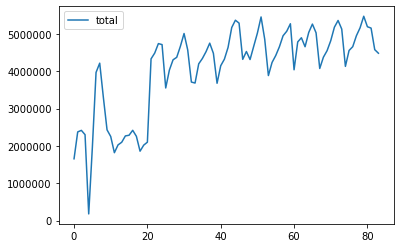

In [55]:
df.plot()
plt.ticklabel_format(style='plain', axis='y')

In [56]:
df.columns = ['ds','y']
df.head()

,ds,y
0,01-09-2021,1653794
1,02-09-2021,2373894
2,03-09-2021,2415128
3,04-09-2021,2299748
4,05-09-2021,177030


In [57]:
df['ds'] = pd.to_datetime(df['ds'])

In [58]:
df.head()

,ds,y
0,2021-01-09,1653794
1,2021-02-09,2373894
2,2021-03-09,2415128
3,2021-04-09,2299748
4,2021-05-09,177030


In [59]:
from fbprophet import Prophet

In [60]:
# Initialize the Model
model=Prophet()

In [61]:
df.columns

Index(['ds', 'y'], dtype='object')

In [62]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [64]:
df.tail()

,ds,y
79,2021-11-19,5472310
80,2021-11-20,5191295
81,2021-11-21,5155336
82,2021-11-22,4576882
83,2021-11-23,4481630


In [65]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=1)

In [66]:
future_dates.tail()

,ds
80,2021-11-23
81,2021-12-09
82,2021-12-10
83,2021-12-11
84,2021-12-12


In [67]:
future_dates.head()

,ds
0,2021-01-09
1,2021-01-10
2,2021-01-11
3,2021-02-09
4,2021-02-10


In [68]:
prediction=model.predict(future_dates)

In [69]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-09,3.430962e+06,2.271605e+06,4.956177e+06,3.430962e+06,3.430962e+06,150967.812390,150967.812390,150967.812390,150967.812390,150967.812390,150967.812390,0.0,0.0,0.0,3.581929e+06
1,2021-01-10,3.433633e+06,1.795872e+06,4.569841e+06,3.433633e+06,3.433633e+06,-283348.346753,-283348.346753,-283348.346753,-283348.346753,-283348.346753,-283348.346753,0.0,0.0,0.0,3.150284e+06
2,2021-01-11,3.436304e+06,1.930827e+06,4.746350e+06,3.436304e+06,3.436304e+06,-56344.913266,-56344.913266,-56344.913266,-56344.913266,-56344.913266,-56344.913266,0.0,0.0,0.0,3.379959e+06
3,2021-02-09,3.513769e+06,1.651344e+06,4.491354e+06,3.513769e+06,3.513769e+06,-412323.264976,-412323.264976,-412323.264976,-412323.264976,-412323.264976,-412323.264976,0.0,0.0,0.0,3.101446e+06
4,2021-02-10,3.516440e+06,2.167979e+06,4.887900e+06,3.516440e+06,3.516440e+06,23394.055885,23394.055885,23394.055885,23394.055885,23394.055885,23394.055885,0.0,0.0,0.0,3.539834e+06


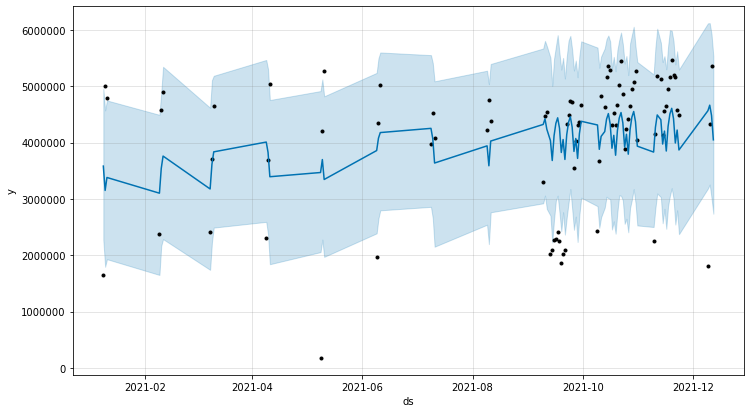

In [70]:
### plot the predicted projection
model.plot(prediction)
plt.ticklabel_format(style='plain', axis='y')

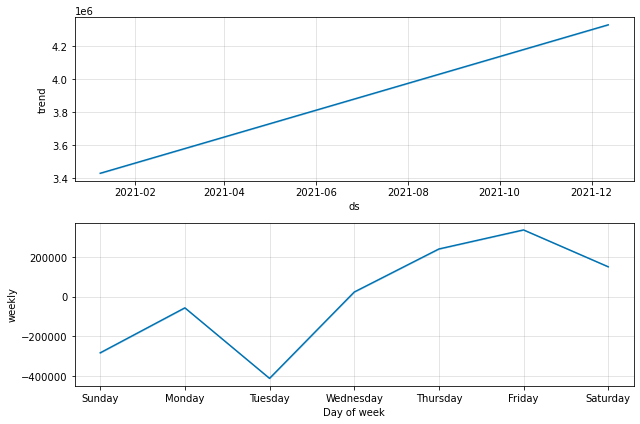

In [71]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)
plt.ticklabel_format(style='plain', axis='y')

In [72]:
df.head()

,ds,y
0,2021-01-09,1653794
1,2021-02-09,2373894
2,2021-03-09,2415128
3,2021-04-09,2299748
4,2021-05-09,177030


In [73]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='120 days', period='60 days', horizon = '60 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-06-14 00:00:00 and 2021-10-12 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-07-09,3.451513e+06,1.842166e+06,5.095380e+06,3966728,2021-06-14
1,2021-07-10,2.185611e+06,4.563838e+05,3.863830e+06,4524241,2021-06-14
2,2021-07-11,3.012633e+06,1.376986e+06,4.617104e+06,4073233,2021-06-14
3,2021-08-09,3.962072e+06,2.255678e+06,5.505021e+06,4215316,2021-06-14
4,2021-08-10,2.847557e+06,1.065016e+06,4.401149e+06,4751628,2021-06-14


In [74]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,1.905807e+12,1.380510e+06,1.328531e+06,0.268919,0.248217,0.666667
1,7 days,1.911744e+12,1.382658e+06,1.331196e+06,0.272526,0.259037,0.666667
2,8 days,1.890571e+12,1.374980e+06,1.322169e+06,0.274747,0.259037,0.666667
3,9 days,1.626449e+12,1.275323e+06,1.224505e+06,0.258806,0.251680,0.833333
4,10 days,1.463990e+12,1.209954e+06,1.181098e+06,0.248934,0.251680,0.833333


In [75]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,1.905807e+12,1.380510e+06,1.328531e+06,0.268919,0.248217,0.666667
1,7 days,1.911744e+12,1.382658e+06,1.331196e+06,0.272526,0.259037,0.666667
2,8 days,1.890571e+12,1.374980e+06,1.322169e+06,0.274747,0.259037,0.666667
3,9 days,1.626449e+12,1.275323e+06,1.224505e+06,0.258806,0.251680,0.833333
4,10 days,1.463990e+12,1.209954e+06,1.181098e+06,0.248934,0.251680,0.833333


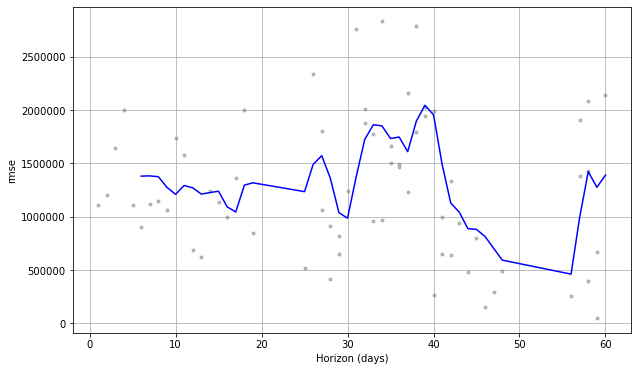

In [76]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.ticklabel_format(style='plain', axis='y')